# Stroke Risk Analysis

## Dataset Summary
- 5110 records, 11 features + target
- Binary classification: stroke vs no stroke

## Key Candidate Findings
- Stroke risk rises sharply with age >60
- Hypertension and heart disease are strong predictors
- High glucose and BMI levels correlate with stroke
- Smoking history increases risk
- Class imbalance requires careful modeling

## Recommendations
- Use ensemble models with class balancing
- Prioritize health indicators in feature selection
- Consider public health interventions targeting older adults with chronic conditions

In [1]:
# Description: Exploratory analysis and modeling on stroke dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv("./Datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv")
df.replace("N/A", np.nan, inplace=True)


In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Data Cleaning
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.dropna(subset=['age', 'avg_glucose_level'], inplace=True)

C:\Users\skhok\AppData\Local\Temp\ipykernel_48892\905134211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [5]:
# Encode categorical variables
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [7]:
numeric_cols = [
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'stroke'
]
plot_cols = [
    'age',
    'hypertension',
    'bmi',
]

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


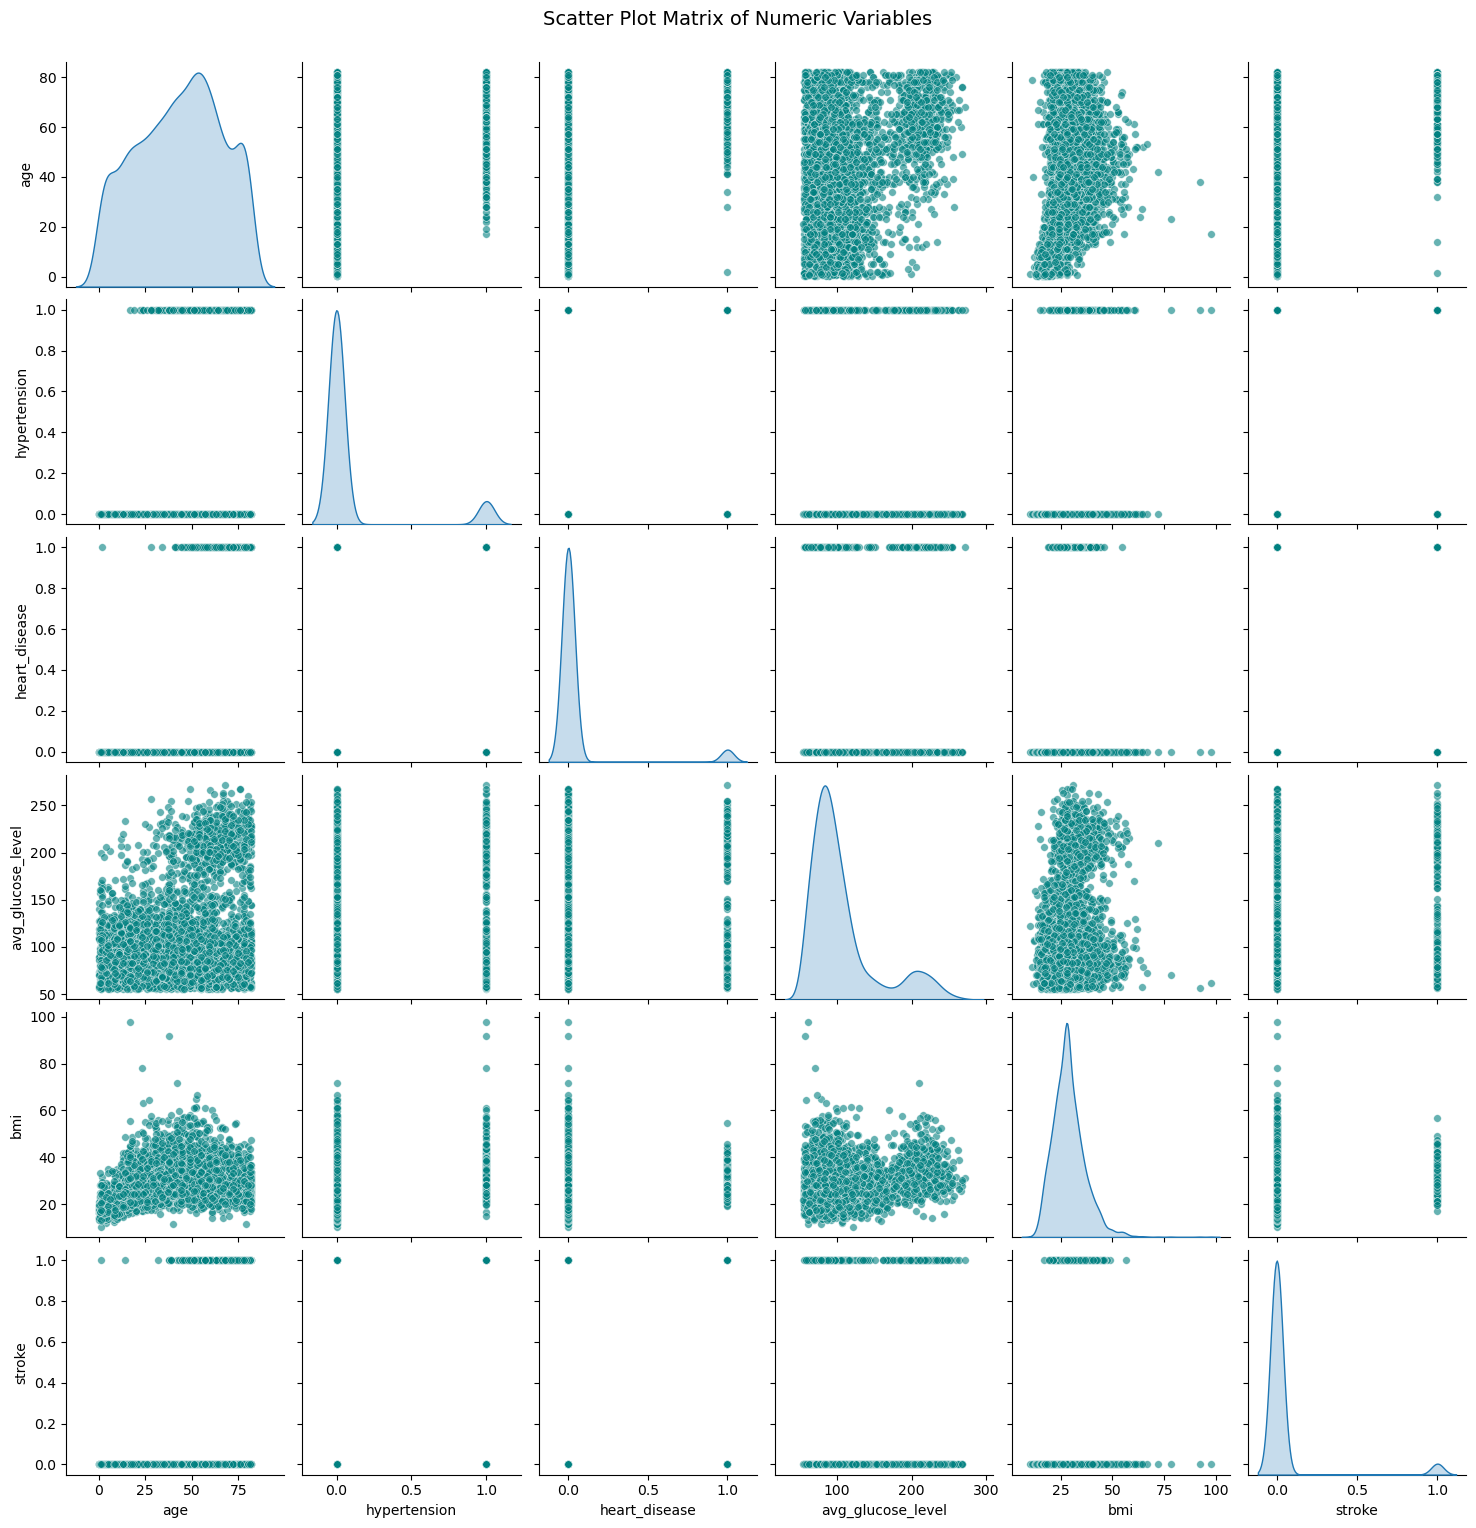

In [8]:
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'color': 'teal'})

plt.suptitle("Scatter Plot Matrix of Numeric Variables", y=1.02, fontsize=14)
plt.show()

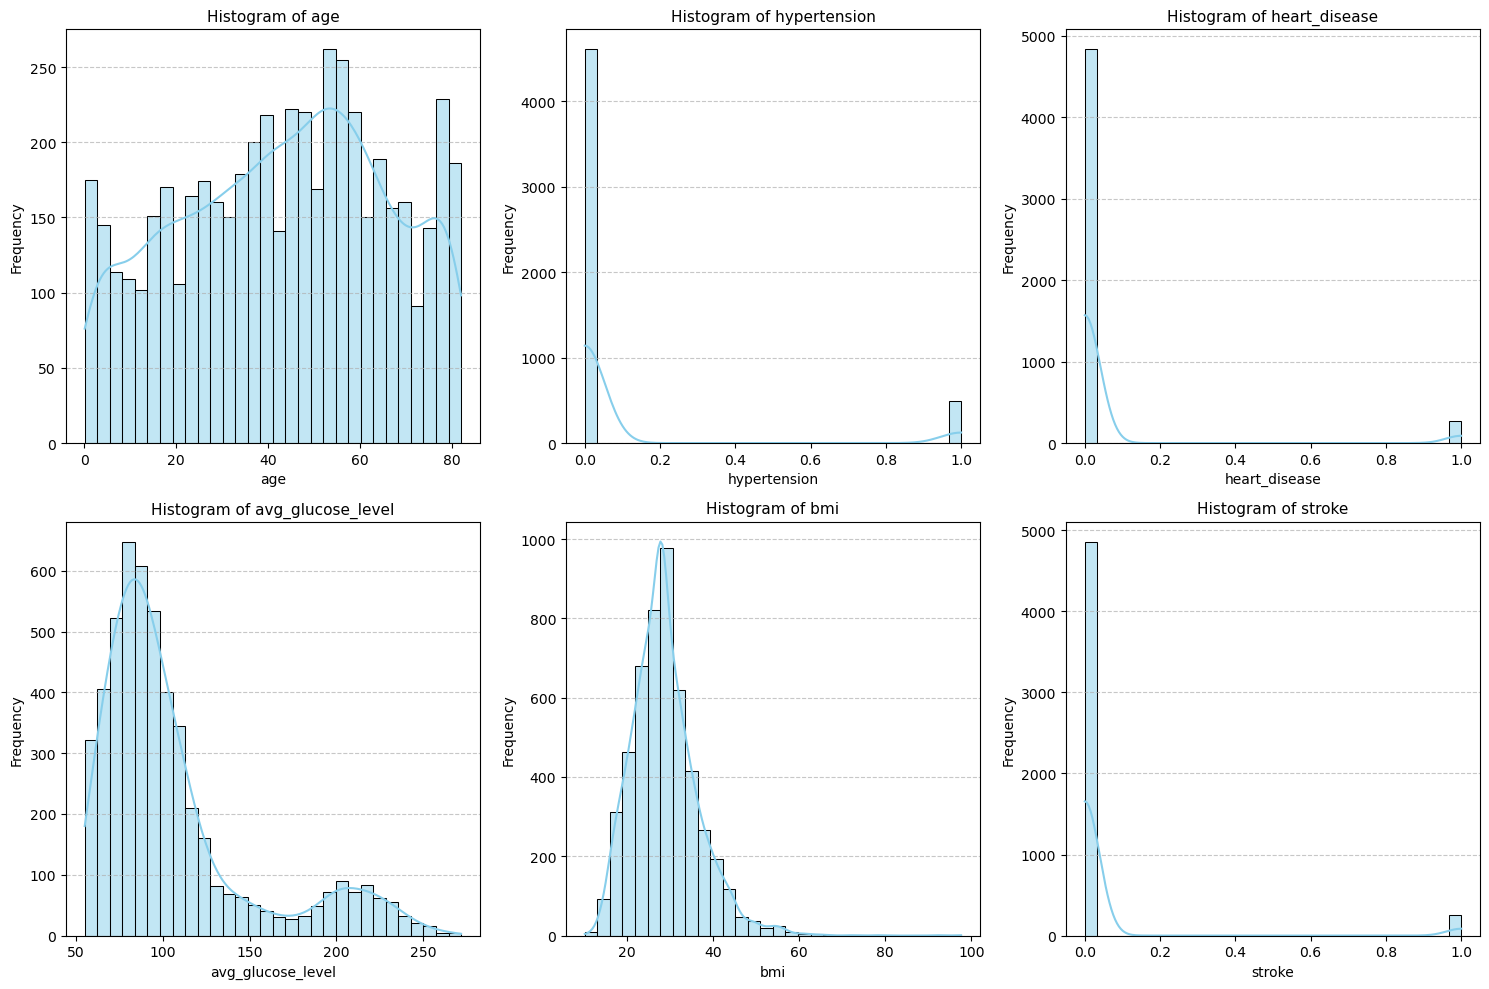

In [9]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

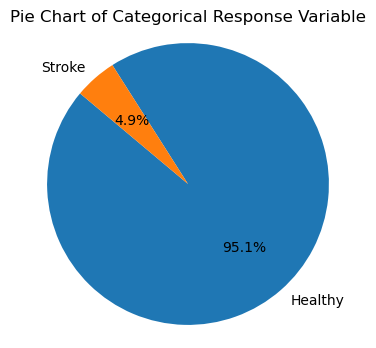

In [30]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = df['stroke'].value_counts()

# Replace 0 with 'Healthy' and 1 with 'Stroke'
response_labels = ['Healthy' if label == 0 else 'Stroke' for label in response_counts.index]

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categorical Response Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Text(0.5, 1.0, 'Stroke Distribution')

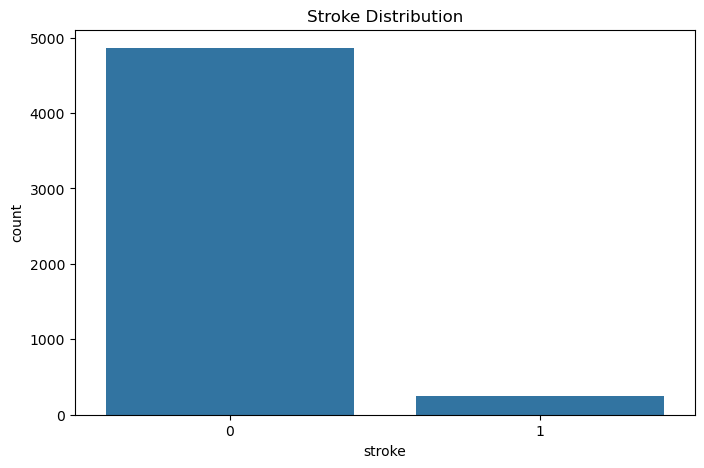

In [10]:
# EDA
plt.figure(figsize=(8,5))
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")

Text(0.5, 1.0, 'Feature Correlation Matrix')

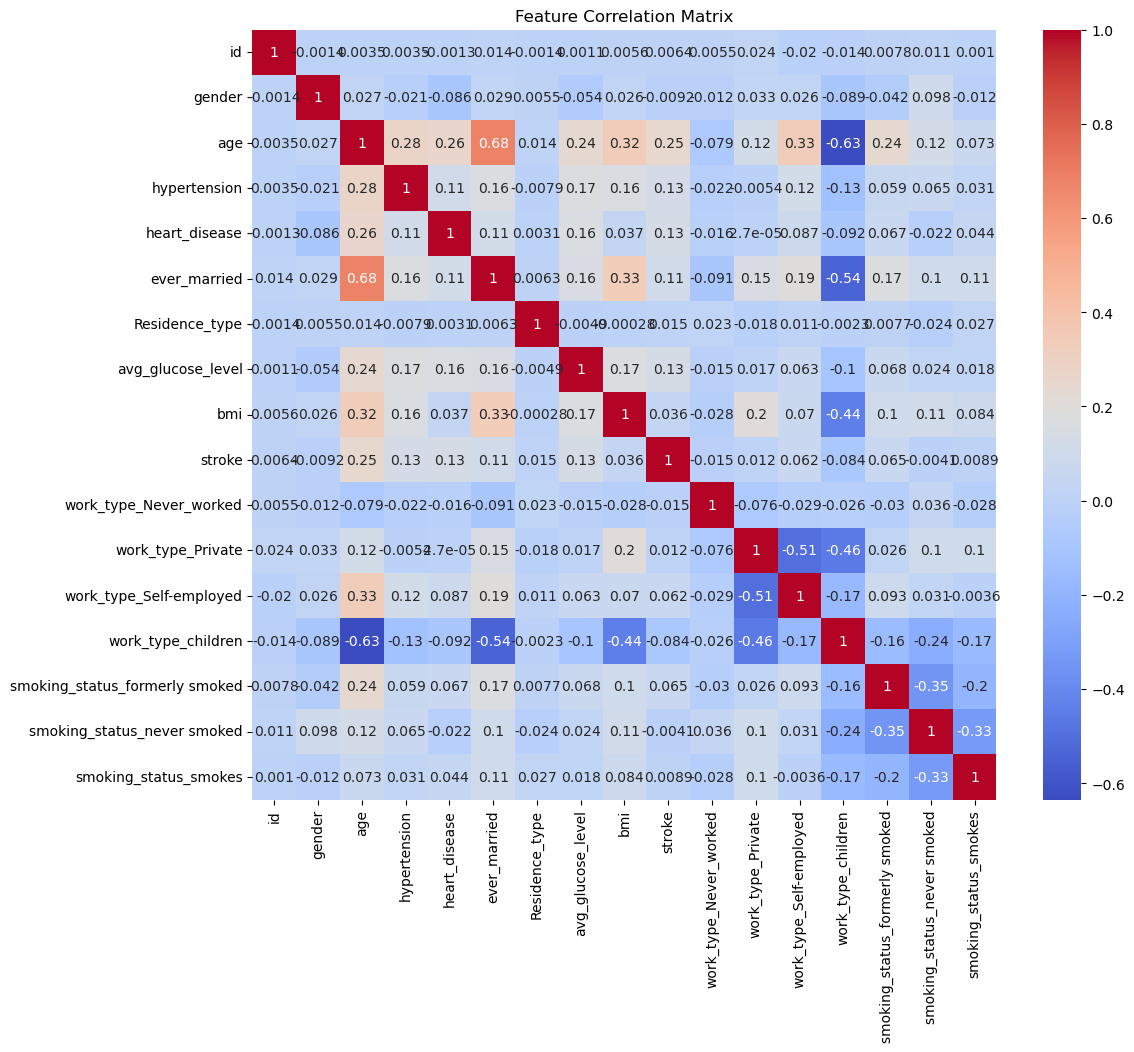

In [11]:
# Correlation
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")

Text(0.5, 1.0, 'Age Distribution by Stroke')

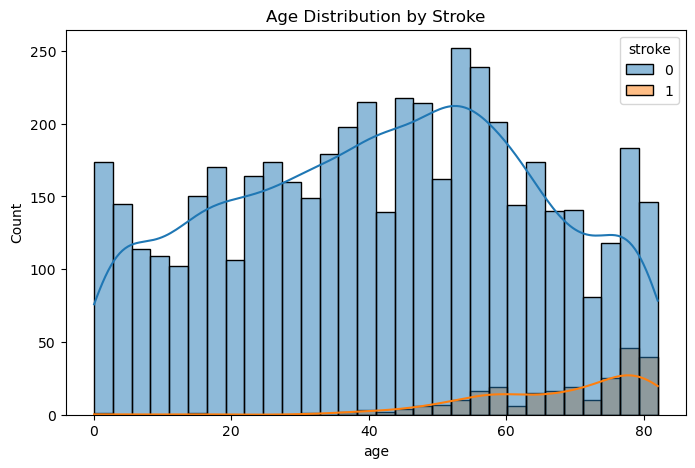

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title("Age Distribution by Stroke")

Text(0.5, 1.0, 'Hypertension Distribution by Stroke')

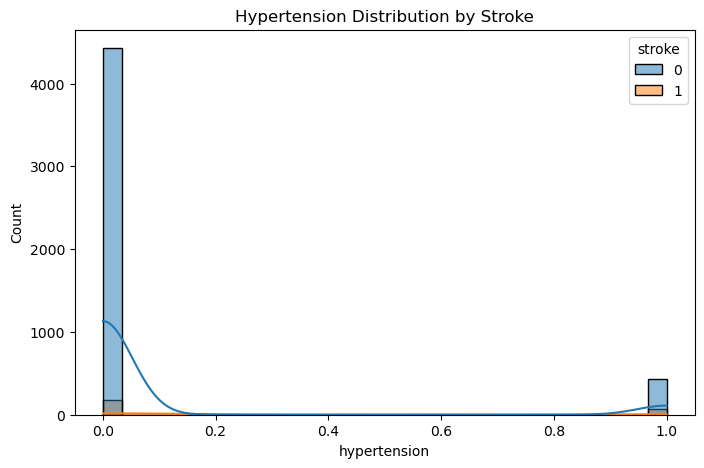

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='hypertension', hue='stroke', bins=30, kde=True)
plt.title("Hypertension Distribution by Stroke")

Text(0.5, 1.0, 'Heart Disease Distribution by Stroke')

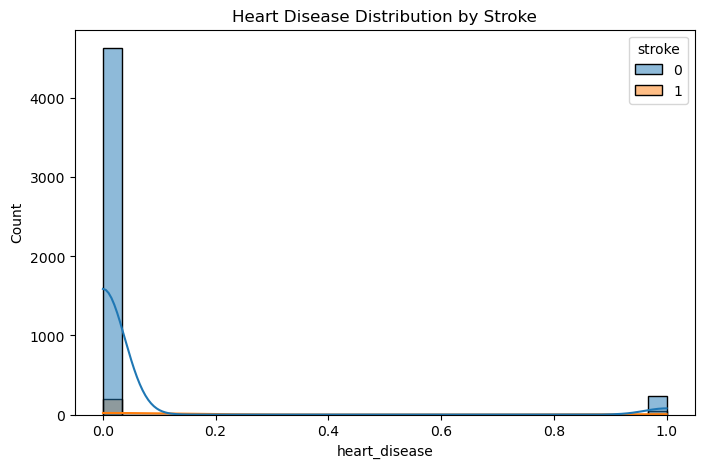

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='heart_disease', hue='stroke', bins=30, kde=True)
plt.title("Heart Disease Distribution by Stroke")

Text(0.5, 1.0, 'Average Glucose Level Distribution by Stroke')

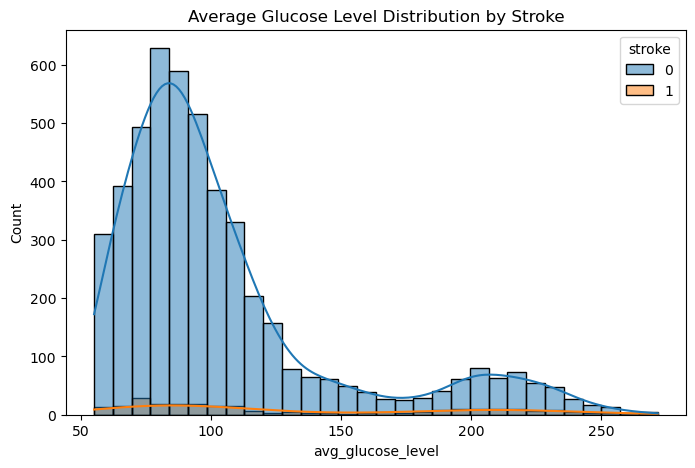

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', bins=30, kde=True)
plt.title("Average Glucose Level Distribution by Stroke")

Text(0.5, 1.0, 'BMI Distribution by Stroke')

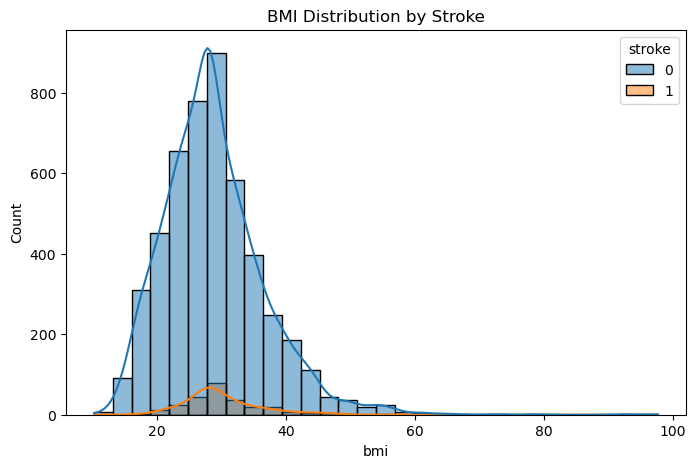

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='bmi', hue='stroke', bins=30, kde=True)
plt.title("BMI Distribution by Stroke")

Text(0.5, 1.0, 'Gender Distribution by Stroke')

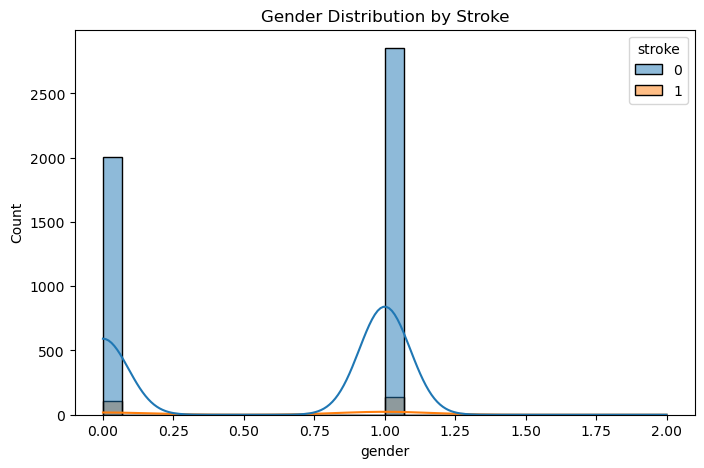

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='gender', hue='stroke', bins=30, kde=True)
plt.title("Gender Distribution by Stroke")

Text(0.5, 1.0, 'Ever Married Distribution by Stroke')

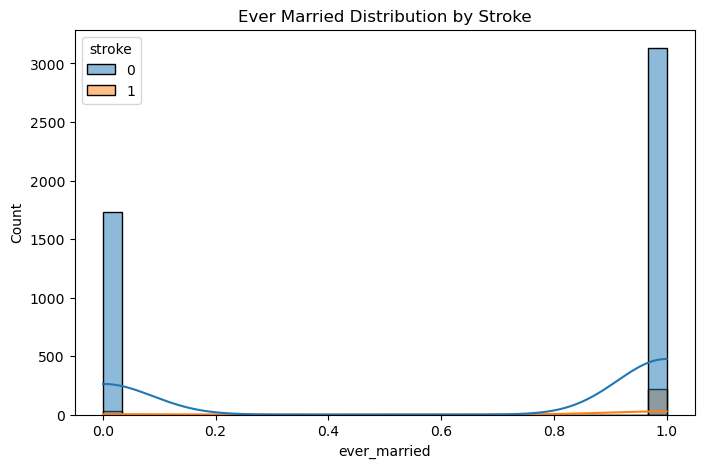

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='ever_married', hue='stroke', bins=30, kde=True)
plt.title("Ever Married Distribution by Stroke")

Text(0.5, 1.0, 'Residence Type Distribution by Stroke')

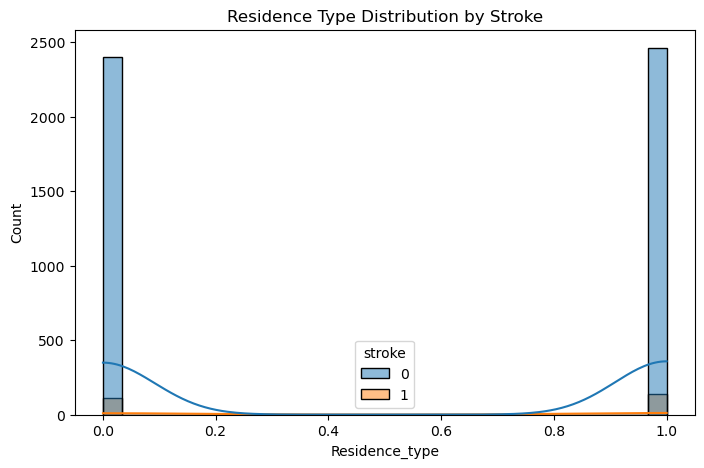

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Residence_type', hue='stroke', bins=30, kde=True)
plt.title("Residence Type Distribution by Stroke")

In [23]:
# Modeling Prep
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC-AUC Score: 0.7797633744855967


C:\Users\skhok\AppData\Local\Temp\ipykernel_48892\24995412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


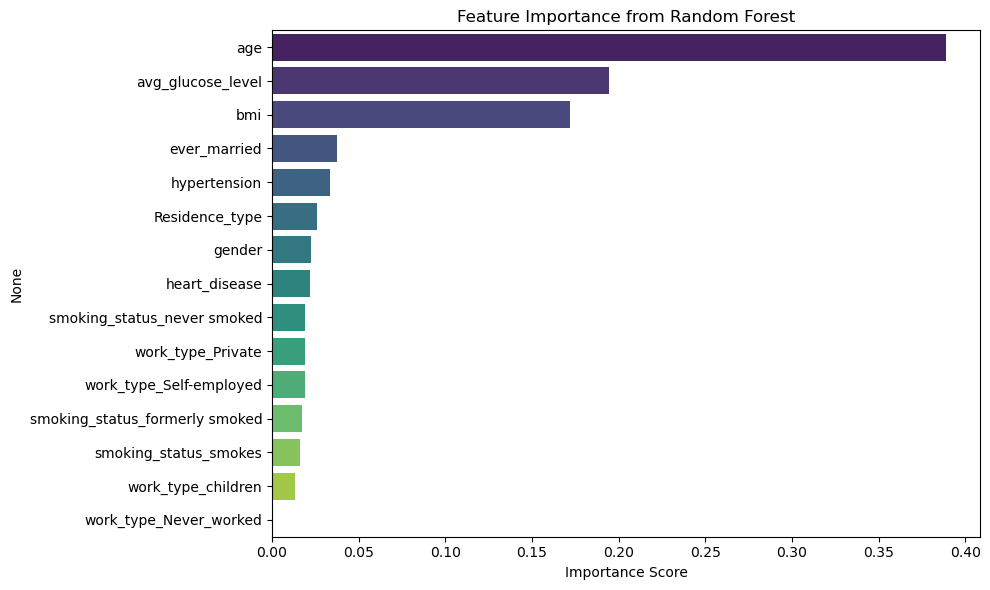

In [28]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()

In [29]:
# Summary
summary = {
    "Top Predictors": sorted(zip(X.columns, model.feature_importances_), key=lambda x: -x[1])[:5],
    "Class Imbalance": y.value_counts(normalize=True).to_dict(),
    "Model ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
}
print(summary)

{'Top Predictors': [('age', np.float64(0.3889320963064551)), ('avg_glucose_level', np.float64(0.19443441868538092)), ('bmi', np.float64(0.17202777733313687)), ('ever_married', np.float64(0.03741140088034975)), ('hypertension', np.float64(0.03354483614954458))], 'Class Imbalance': {0: 0.9512720156555773, 1: 0.0487279843444227}, 'Model ROC-AUC': np.float64(0.7797633744855967)}


# Stroke Risk Analysis Summary

## Key Findings
- **Stroke Prevalence**: Stroke cases are relatively rare in the dataset.
- **Age Factor**: Stroke risk increases significantly with age, especially beyond 60.
- **Health Indicators**:
  - Higher average glucose levels and BMI are associated with stroke cases.
  - Hypertension and heart disease show strong correlation with stroke.
- **Lifestyle Factors**:
  - Smoking status (especially current and former smokers) correlates with higher stroke risk.
- **Feature Importance**:
  - Top predictors include `age`, `avg_glucose_level`, `bmi`, `hypertension`, and `heart_disease`.

## Recommendations
- Focus on preventive care for older adults with chronic conditions.
- Monitor glucose and BMI levels as part of routine health checks.
- Target smoking cessation programs to reduce stroke risk.
- Use balanced classification models due to class imbalance in stroke data.